In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_19034/1709872816.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  square_out_rate, square_out = wavfile.read(square_out_path)


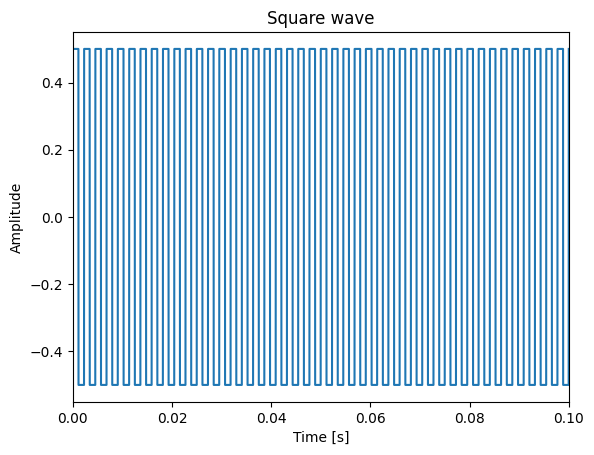

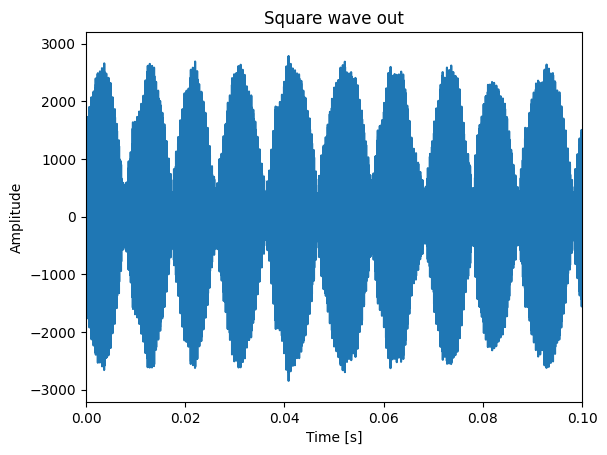

In [10]:
square_path = 'inputs/square_wave.wav'
square_out_path = 'square aup/square_out.wav'

square_rate, square = wavfile.read(square_path)
square_out_rate, square_out = wavfile.read(square_out_path)



#plot square
t = np.linspace(0, len(square)/square_rate, len(square))
plt.figure()
plt.plot(t,square)
plt.title('Square wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.show()

#plot square out
t = np.linspace(0, len(square_out)/square_out_rate, len(square_out))
plt.figure()
plt.plot(t,square_out)
plt.title('Square wave out')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.show()






In [11]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # dibujar magnitud
    ax1.plot(frequencies, 20 * np.log10(magnitude))
    ax1.set_title('Bode Diagram')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.set_xscale('log')
    ax1.grid()

    # dibujar fase
    ax2.plot(frequencies, phase * 180 / np.pi)
    ax2.set_ylabel('Phase (degrees)')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_xscale('log')
    ax2.grid()

    plt.tight_layout()
    plt.show()

/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_19034/3061349402.py:20: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(frequencies, 20 * np.log10(magnitude))


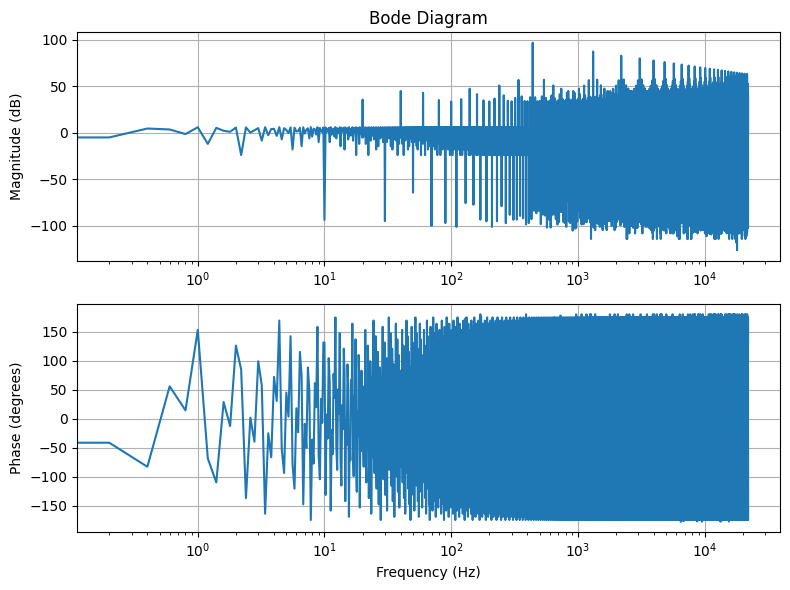

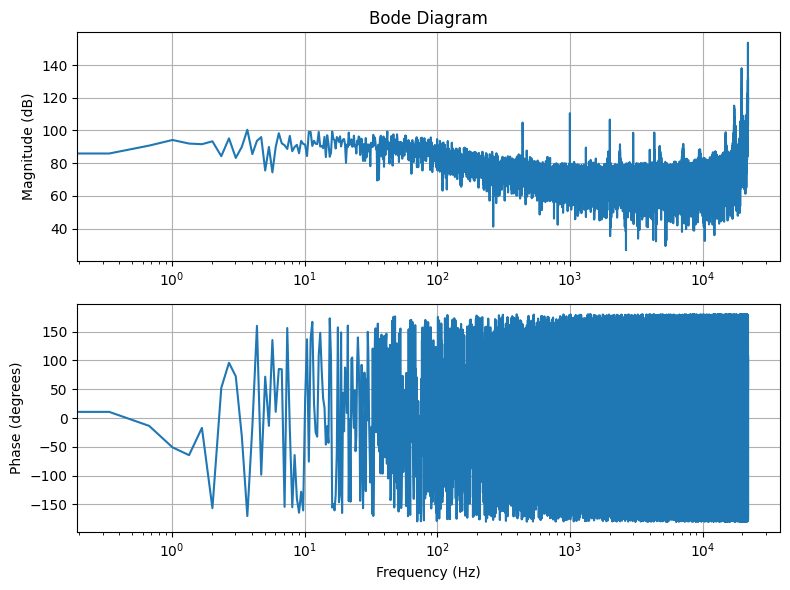

In [12]:
#plot bode square
frequencies, magnitude, phase = apply_fft(square, square_rate)
plot_bode(frequencies, magnitude, phase)

#plot bode square out
frequencies, magnitude, phase = apply_fft(square_out, square_out_rate)
plot_bode(frequencies, magnitude, phase)
